RNN MODEL

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values
X_train, X_test = X_train / 255.0, X_test / 255.0

# Define RNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(128, input_shape=(X_train.shape[1:]), activation='relu', return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
# Train model
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2, verbose=1)

# Evaluate model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", test_loss)
print("Test accuracy:", test_accuracy)




Epoch 1/10
1500/1500 [==============================] - 153s 100ms/step - loss: 0.7987 - accuracy: 0.7366 - val_loss: 0.1968 - val_accuracy: 0.9419
Epoch 2/10
1500/1500 [==============================] - 135s 90ms/step - loss: 0.2168 - accuracy: 0.9404 - val_loss: 0.1255 - val_accuracy: 0.9652
Epoch 3/10
1500/1500 [==============================] - 145s 97ms/step - loss: 0.1399 - accuracy: 0.9616 - val_loss: 0.1099 - val_accuracy: 0.9678
Epoch 4/10
1500/1500 [==============================] - 136s 91ms/step - loss: 0.1107 - accuracy: 0.9710 - val_loss: 0.0804 - val_accuracy: 0.9783
Epoch 5/10
1500/1500 [==============================] - 137s 91ms/step - loss: 0.0919 - accuracy: 0.9758 - val_loss: 0.0674 - val_accuracy: 0.9814
Epoch 6/10
1500/1500 [==============================] - 147s 98ms/step - loss: 0.0776 - accuracy: 0.9796 - val_loss: 0.0850 - val_accuracy: 0.9793
Epoch 7/10
1500/1500 [==============================] - 148s 99ms/step - loss: 0.0678 - accuracy: 0.9825 - val_loss: 

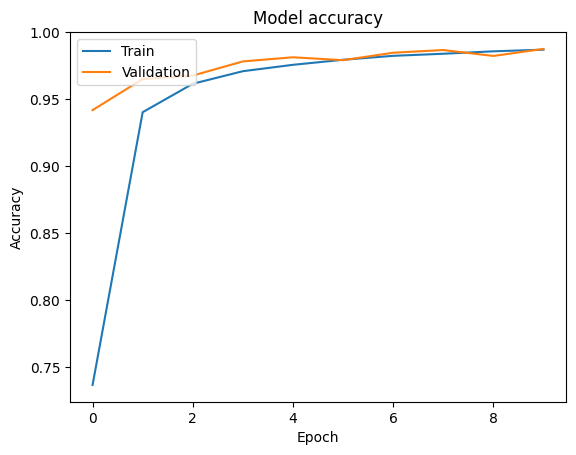

In [ ]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()



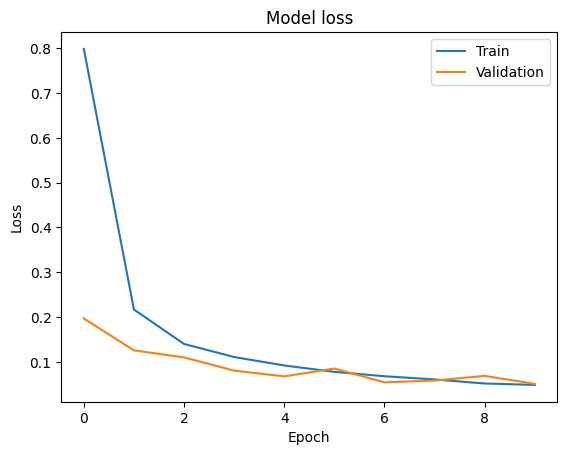

In [ ]:
# Plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()